<a href="https://colab.research.google.com/github/Maria-Data-Analyst/RRHH_Machine_Learning-/blob/main/procesamiento_rrhh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-cloud-bigquery pandas openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import re
from google.colab import files

In [ ]:
datos = pd.read_csv('/content/rh_data.csv')

In [ ]:
datos.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
def format_column_name(name):
    # Reemplazar mayúsculas precedidas por una letra minúscula con minúscula y un guion bajo
    # Ejemplo: 'TotalWorkingYears' -> 'total_working_years'
    formatted_name = re.sub(r'(?<!^)(?<!_)([A-Z])', r'_\1', name).lower()
    return formatted_name

# Aplicar la función a todos los nombres de columnas
datos.columns = [format_column_name(col) for col in datos.columns]

In [ ]:
datos.head()

,age,attrition,business_travel,department,distance_from_home,education,education_field,employee_count,employee_i_d,gender,...,num_companies_worked,over18,percent_salary_hike,standard_hours,stock_option_level,total_working_years,training_times_last_year,years_at_company,years_since_last_promotion,years_with_curr_manager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
# Cambiar el nombre de la columna 'employee_i_d' a 'employee_id'
datos = datos.rename(columns={'employee_i_d': 'employee_id'})

In [ ]:
# Filtrar los valores de EmployeeCount que sean diferentes a 1
diferentes_a_1 = datos[datos['employee_count'] != 1]

# Mostrar el resultado
print(diferentes_a_1)

Empty DataFrame
Columns: [age, attrition, business_travel, department, distance_from_home, education, education_field, employee_count, employee_id, gender, job_level, job_role, marital_status, monthly_income, num_companies_worked, over18, percent_salary_hike, standard_hours, stock_option_level, total_working_years, training_times_last_year, years_at_company, years_since_last_promotion, years_with_curr_manager]
Index: []

[0 rows x 24 columns]


In [ ]:
# Elimina la columna 'EmployeeCount'
datos = datos.drop(columns=['employee_count'])

In [ ]:
# Visualizar valores nulos
print("Valores nulos por columna:")
print(datos.isnull().sum())

Valores nulos por columna:
age                            0
attrition                      0
business_travel                0
department                     0
distance_from_home             0
education                      0
education_field                0
employee_id                    0
gender                         0
job_level                      0
job_role                       0
marital_status                 0
monthly_income                 0
num_companies_worked          19
over18                         0
percent_salary_hike            0
standard_hours                 0
stock_option_level             0
total_working_years            9
training_times_last_year       0
years_at_company               0
years_since_last_promotion     0
years_with_curr_manager        0
dtype: int64


In [ ]:
datos_filtrados = datos[datos['total_working_years'].isnull()]
datos_filtrados.head(19)

,age,attrition,business_travel,department,distance_from_home,education,education_field,employee_id,gender,job_level,...,num_companies_worked,over18,percent_salary_hike,standard_hours,stock_option_level,total_working_years,training_times_last_year,years_at_company,years_since_last_promotion,years_with_curr_manager
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,24,Male,1,...,1.0,Y,14,8,0,NaN,4,20,11,6
137,43,No,Travel_Frequently,Sales,14,3,Life Sciences,138,Female,1,...,7.0,Y,14,8,2,NaN,3,3,1,2
308,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,309,Male,1,...,4.0,Y,13,8,1,NaN,2,5,1,3
574,37,No,Travel_Rarely,Research & Development,23,3,Life Sciences,575,Male,3,...,7.0,Y,16,8,1,NaN,2,6,1,3
1517,36,No,Non-Travel,Research & Development,5,4,Life Sciences,1518,Male,1,...,7.0,Y,21,8,0,NaN,4,9,0,8
2367,39,No,Travel_Rarely,Sales,2,4,Life Sciences,2368,Male,1,...,0.0,Y,17,8,0,NaN,5,10,0,7
3120,35,No,Travel_Rarely,Research & Development,12,2,Medical,3121,Female,2,...,4.0,Y,23,8,1,NaN,2,8,0,0
3818,28,Yes,Travel_Rarely,Human Resources,1,3,Medical,3819,Female,2,...,1.0,Y,16,8,1,NaN,2,1,0,0
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,4410,Male,2,...,0.0,Y,12,8,0,NaN,6,21,3,9


In [ ]:
###### Nulos de num_companies_worked ##############

In [ ]:
# Crear un boxplot interactivo usando Plotly para num_companies_worked
fig = px.box(datos, y='num_companies_worked', points="all", title="Boxplot de num_companies_worked")
fig.show()

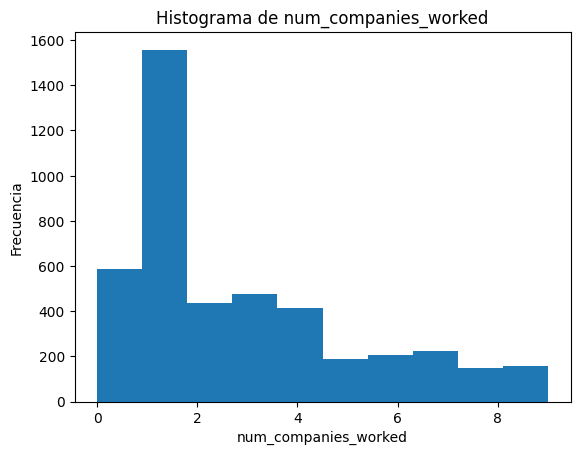

In [ ]:
plt.hist(datos["num_companies_worked"], bins=10)

#añadir título y etiquetas
plt.title("Histograma de num_companies_worked")
plt.xlabel("num_companies_worked")
plt.ylabel("Frecuencia")

#mostrar el histograma
plt.show()

In [ ]:
# Filtramos los datos para obtener los nulos en 'num_companies_worked'
nulos = datos[datos['num_companies_worked'].isnull()]

# Contamos los nulos según 'Attrition'
conteo_nulos = nulos['attrition'].value_counts()

print("Conteo de nulos en 'num_companies_worked' según 'Attrition':")
print(conteo_nulos)

Conteo de nulos en 'num_companies_worked' según 'Attrition':
attrition
No     15
Yes     4
Name: count, dtype: int64


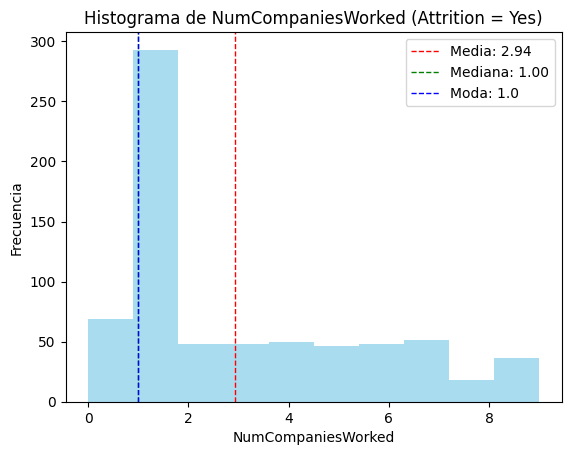

Media (Attrition = Yes): 2.94
Mediana (Attrition = Yes): 1.00
Moda (Attrition = Yes): [1.]


In [ ]:
# Filtrar por Attrition igual a 'Yes'
attrition_yes = datos[datos["attrition"] == 'Yes']["num_companies_worked"]

# Calcular la media, mediana y moda para Attrition = 'Yes'
media_yes = attrition_yes.mean()
mediana_yes = attrition_yes.median()
moda_yes = attrition_yes.mode()

# Histograma para Attrition = 'Yes'
plt.hist(attrition_yes, bins=10, color='skyblue', alpha=0.7)
plt.title("Histograma de NumCompaniesWorked (Attrition = Yes)")
plt.xlabel("NumCompaniesWorked")
plt.ylabel("Frecuencia")

# Añadir líneas para media, mediana y moda
plt.axvline(media_yes, color='red', linestyle='dashed', linewidth=1, label=f'Media: {media_yes:.2f}')
plt.axvline(mediana_yes, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {mediana_yes:.2f}')
if not moda_yes.empty:
    plt.axvline(moda_yes[0], color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {moda_yes[0]}')

plt.legend()
plt.show()

# Mostrar resultados
print(f"Media (Attrition = Yes): {media_yes:.2f}")
print(f"Mediana (Attrition = Yes): {mediana_yes:.2f}")
print(f"Moda (Attrition = Yes): {moda_yes.values}")


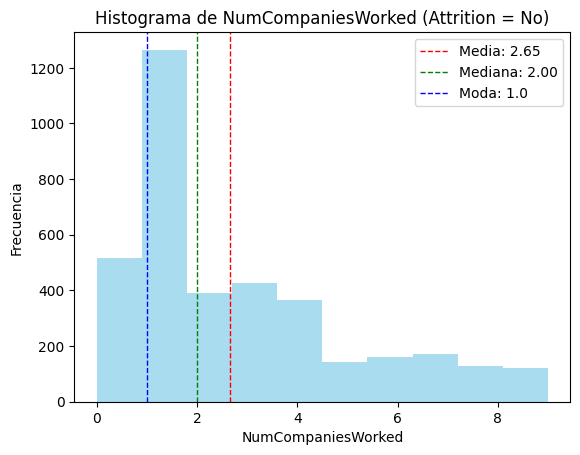

Media (Attrition = No): 2.65
Mediana (Attrition = No): 2.00
Moda (Attrition = No): [1.]


In [ ]:
# Filtrar por Attrition igual a 'No'
attrition_no = datos[datos["attrition"] == 'No']["num_companies_worked"]

# Calcular la media, mediana y moda para Attrition = 'No'
media_no = attrition_no.mean()
mediana_no = attrition_no.median()
moda_no = attrition_no.mode()

# Histograma para Attrition = 'No'
plt.hist(attrition_no, bins=10, color='skyblue', alpha=0.7)
plt.title("Histograma de NumCompaniesWorked (Attrition = No)")
plt.xlabel("NumCompaniesWorked")
plt.ylabel("Frecuencia")

# Añadir líneas para media, mediana y moda
plt.axvline(media_no, color='red', linestyle='dashed', linewidth=1, label=f'Media: {media_no:.2f}')
plt.axvline(mediana_no, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {mediana_no:.2f}')
if not moda_no.empty:
    plt.axvline(moda_no[0], color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {moda_no[0]}')

plt.legend()
plt.show()

# Mostrar resultados
print(f"Media (Attrition = No): {media_no:.2f}")
print(f"Mediana (Attrition = No): {mediana_no:.2f}")
print(f"Moda (Attrition = No): {moda_no.values}")


In [ ]:
# Calcular la moda de 'NumCompaniesWorked'
moda_num_companies_worked = datos['num_companies_worked'].mode()[0]

# Imputar la moda en los valores nulos de 'NumCompaniesWorked'
datos['num_companies_worked'].fillna(moda_num_companies_worked, inplace=True)

# Mostrar la moda calculada y un resumen de los datos imputados
print(f"Moda de 'NumCompaniesWorked': {moda_num_companies_worked}")
print(f"Número de valores nulos después de la imputación: {datos['num_companies_worked'].isnull().sum()}")

Moda de 'NumCompaniesWorked': 1.0
Número de valores nulos después de la imputación: 0


In [ ]:
########################################################

In [ ]:
###### Nulos de TotalWorkingYears ##############

In [ ]:
# Crear un boxplot interactivo usando Plotly para TrainingTimesLastYear
fig = px.box(datos, y='total_working_years', points="all", title="Boxplot de TotalWorkingYears")
fig.show()

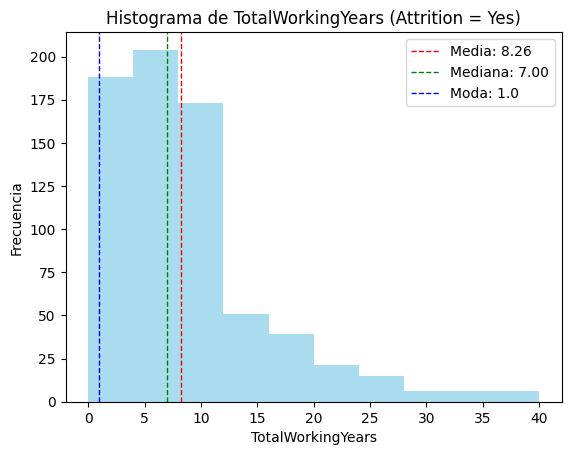

Media (Attrition = Yes): 8.26
Mediana (Attrition = Yes): 7.00
Moda (Attrition = Yes): [1.]


In [ ]:
# Filtrar por Attrition igual a 'Yes'
attrition_yes = datos[datos["attrition"] == 'Yes']["total_working_years"]

# Calcular la media, mediana y moda para Attrition = 'Yes'
media_yes = attrition_yes.mean()
mediana_yes = attrition_yes.median()
moda_yes = attrition_yes.mode()

# Histograma para Attrition = 'Yes'
plt.hist(attrition_yes, bins=10, color='skyblue', alpha=0.7)
plt.title("Histograma de TotalWorkingYears (Attrition = Yes)")
plt.xlabel("TotalWorkingYears")
plt.ylabel("Frecuencia")

# Añadir líneas para media, mediana y moda
plt.axvline(media_yes, color='red', linestyle='dashed', linewidth=1, label=f'Media: {media_yes:.2f}')
plt.axvline(mediana_yes, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {mediana_yes:.2f}')
if not moda_yes.empty:
    plt.axvline(moda_yes[0], color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {moda_yes[0]}')

plt.legend()
plt.show()

# Mostrar resultados
print(f"Media (Attrition = Yes): {media_yes:.2f}")
print(f"Mediana (Attrition = Yes): {mediana_yes:.2f}")
print(f"Moda (Attrition = Yes): {moda_yes.values}")

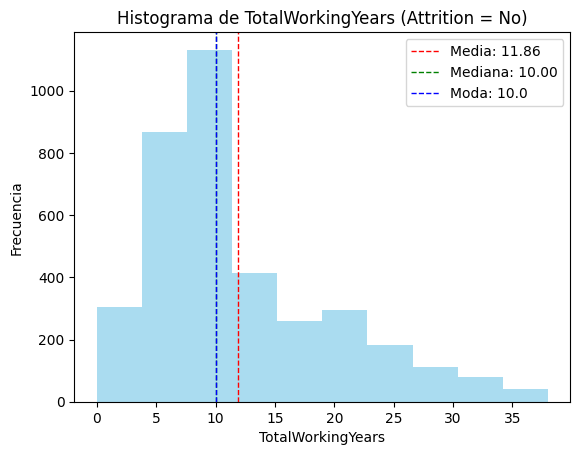

Media (Attrition = No): 11.86
Mediana (Attrition = No): 10.00
Moda (Attrition = No): [10.]


In [ ]:
# Filtrar por Attrition igual a 'No'
attrition_no = datos[datos["attrition"] == 'No']["total_working_years"]

# Calcular la media, mediana y moda para Attrition = 'No'
media_no = attrition_no.mean()
mediana_no = attrition_no.median()
moda_no = attrition_no.mode()

# Histograma para Attrition = 'No'
plt.hist(attrition_no, bins=10, color='skyblue', alpha=0.7)
plt.title("Histograma de TotalWorkingYears (Attrition = No)")
plt.xlabel("TotalWorkingYears")
plt.ylabel("Frecuencia")

# Añadir líneas para media, mediana y moda
plt.axvline(media_no, color='red', linestyle='dashed', linewidth=1, label=f'Media: {media_no:.2f}')
plt.axvline(mediana_no, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {mediana_no:.2f}')
if not moda_no.empty:
    plt.axvline(moda_no[0], color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {moda_no[0]}')

plt.legend()
plt.show()

# Mostrar resultados
print(f"Media (Attrition = No): {media_no:.2f}")
print(f"Mediana (Attrition = No): {mediana_no:.2f}")
print(f"Moda (Attrition = No): {moda_no.values}")

In [ ]:
# Calcular la moda de 'TotalWorkingYears'
moda_attition_no = datos[datos["attrition"] == 'No']["total_working_years"].mode()[0]

# Imputar la moda en los valores nulos de 'TrainingTimesLastYear'
datos['total_working_years'].fillna(moda_attition_no, inplace=True)

# Mostrar la moda calculada y un resumen de los datos imputados
print(f"Moda de 'TotalWorkingYears': {moda_attition_no}")
print(f"Número de valores nulos después de la imputación: {datos['total_working_years'].isnull().sum()}")

Moda de 'TotalWorkingYears': 10.0
Número de valores nulos después de la imputación: 0


In [ ]:
# Calcular la moda de 'TrainingTimesLastYear'
moda_attition_yes = datos[datos["attrition"] == 'Yes']["total_working_years"].mode()[0]

# Imputar la moda en los valores nulos de 'TrainingTimesLastYear'
datos['total_working_years'].fillna(moda_attition_yes, inplace=True)

# Mostrar la moda calculada y un resumen de los datos imputados
print(f"Moda de 'TotalWorkingYears': {moda_attition_yes}")
print(f"Número de valores nulos después de la imputación: {datos['total_working_years'].isnull().sum()}")

Moda de 'TotalWorkingYears': 1.0
Número de valores nulos después de la imputación: 0


In [ ]:
# Visualizar valores nulos
print("Valores nulos por columna:")
print(datos.isnull().sum())

Valores nulos por columna:
age                           0
attrition                     0
business_travel               0
department                    0
distance_from_home            0
education                     0
education_field               0
employee_id                   0
gender                        0
job_level                     0
job_role                      0
marital_status                0
monthly_income                0
num_companies_worked          0
over18                        0
percent_salary_hike           0
standard_hours                0
stock_option_level            0
total_working_years           0
training_times_last_year      0
years_at_company              0
years_since_last_promotion    0
years_with_curr_manager       0
dtype: int64


In [ ]:
############## Duplicados

In [ ]:
# Contar el número total de registros
total_registros = len(datos)

# Encontrar los duplicados en la columna 'employee_id'
duplicados = datos[datos.duplicated(subset='employee_id', keep=False)]

# Contar el número de duplicados
num_duplicados = len(duplicados)

# Mostrar los resultados
print(f'Número total de registros: {total_registros}')
print(f'Número de registros duplicados: {num_duplicados}')

Número total de registros: 4410
Número de registros duplicados: 0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         4410 non-null   int64  
 1   attrition                   4410 non-null   object 
 2   business_travel             4410 non-null   object 
 3   department                  4410 non-null   object 
 4   distance_from_home          4410 non-null   int64  
 5   education                   4410 non-null   int64  
 6   education_field             4410 non-null   object 
 7   employee_id                 4410 non-null   int64  
 8   gender                      4410 non-null   object 
 9   job_level                   4410 non-null   int64  
 10  job_role                    4410 non-null   object 
 11  marital_status              4410 non-null   object 
 12  monthly_income              4410 non-null   int64  
 13  num_companies_worked        4410 

In [ ]:
# Crear un boxplot interactivo usando Plotly para standard_hours
fig = px.box(datos, y='standard_hours', points="all", title="Boxplot  standard_hours")
fig.show()

In [ ]:
# Elimina la columna 'standard_hours'
datos = datos.drop(columns=['standard_hours'])

In [ ]:
# Obtener valores únicos para cada variable
unique_business_travel = datos['business_travel'].unique()
unique_department = datos['department'].unique()
unique_attrition = datos['attrition'].unique()
unique_education_field = datos['education_field'].unique()
unique_gender = datos['gender'].unique()
unique_job_role = datos['job_role'].unique()
unique_marital_status = datos['marital_status'].unique()
unique_over18 = datos['over18'].unique()

# Imprimir los valores únicos
print("Valores únicos para 'business_travel':", unique_business_travel)
print("Valores únicos para 'department':", unique_department)
print("Valores únicos para 'attrition':", unique_attrition)
print("Valores únicos para 'education_field':", unique_education_field)
print("Valores únicos para 'gender':", unique_gender)
print("Valores únicos para 'job_role':", unique_job_role)
print("Valores únicos para 'marital_status':", unique_marital_status)
print("Valores únicos para 'over18':", unique_over18)

Valores únicos para 'business_travel': ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Valores únicos para 'department': ['Sales' 'Research & Development' 'Human Resources']
Valores únicos para 'attrition': ['No' 'Yes']
Valores únicos para 'education_field': ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Valores únicos para 'gender': ['Female' 'Male']
Valores únicos para 'job_role': ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
Valores únicos para 'marital_status': ['Married' 'Single' 'Divorced']
Valores únicos para 'over18': ['Y']


In [ ]:
# Cambiar tipo de dato de employee_id
datos['employee_id'] = datos['employee_id'].astype(str)

In [ ]:
# Elimina la columna over18
datos = datos.drop(columns=['over18'])

In [ ]:
# Seleccionar solo los nombres de las columnas numéricas
numerical_columns = datos.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['age', 'distance_from_home', 'education', 'job_level', 'monthly_income',
       'num_companies_worked', 'percent_salary_hike', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'years_at_company',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')


                                 age  distance_from_home  education  \
age                         1.000000            0.006963  -0.035706   
distance_from_home          0.006963            1.000000  -0.008638   
education                  -0.035706           -0.008638   1.000000   
job_level                  -0.002884           -0.037329   0.045746   
monthly_income             -0.044314           -0.021607   0.006410   
num_companies_worked        0.299186           -0.013069  -0.016151   
percent_salary_hike        -0.033137            0.038125  -0.040531   
stock_option_level         -0.031753            0.011169   0.001261   
total_working_years         0.680340            0.009314  -0.010813   
training_times_last_year   -0.027308           -0.009001   0.010472   
years_at_company            0.311309            0.031684   0.006080   
years_since_last_promotion  0.216513            0.002290   0.022490   
years_with_curr_manager     0.202089            0.021584   0.005358   

     

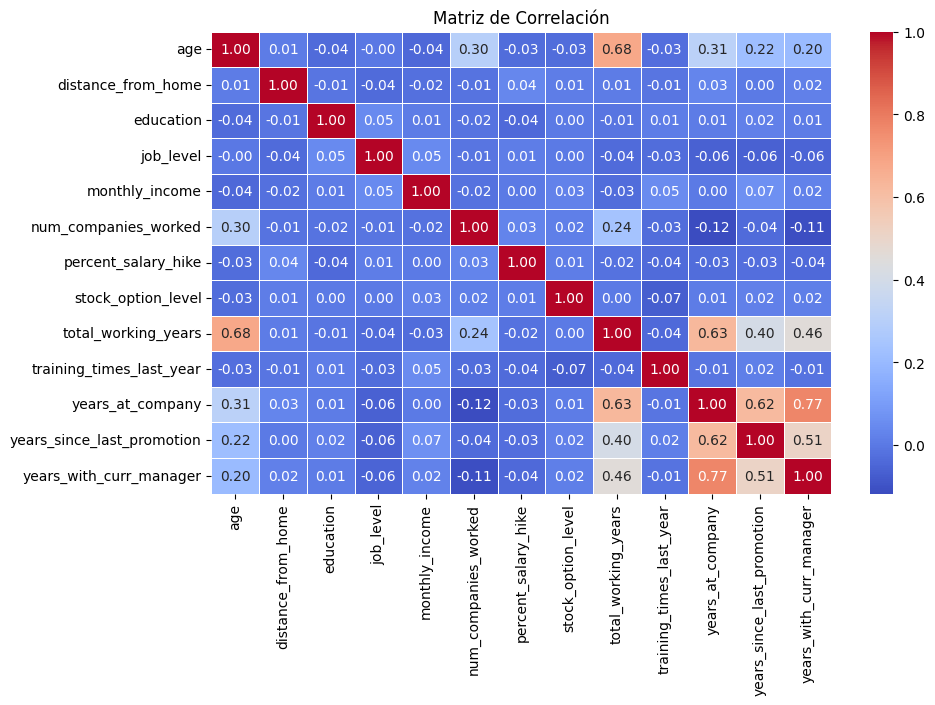

In [ ]:
# Seleccionar solo las columnas numéricas
numerical_columns = datos.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_columns.corr()

# Imprimir la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación usando seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
########## NUEVAS VARIABLES

In [ ]:
# Crear un diccionario de mapeo para convertir números en nombres descriptivos
education_mapping = {
    1: 'Debajo de la universidad',
    2: 'Universidad',
    3: 'Licenciatura',
    4: 'Maestría',
    5: 'Doctorado'
}

# Reemplazar los números por los nombres descriptivos en la columna 'education'
datos['education'] = datos['education'].map(education_mapping)

In [ ]:
# Crear un boxplot interactivo usando Plotly para age y ajustar el tamaño
fig = px.box(datos, y='age', points="all", title="Boxplot age")

# Ajustar el tamaño del gráfico
fig.update_layout(width=800, height=600)  # Puedes cambiar los valores según tus preferencias

fig.show()


In [ ]:
limites_cuartiles = [18, 26, 36, 49, 61]

# Crear una función para asignar los cuartiles basados en los límites
def asignar_cuartil(edad):
    for i in range(len(limites_cuartiles) - 1):
        if limites_cuartiles[i] <= edad <= limites_cuartiles[i + 1]:
            return f'{limites_cuartiles[i]} - {limites_cuartiles[i + 1] - 1}'  # Etiquetas descriptivas
    return 'Fuera_de_rango'  # Para valores fuera del rango definido

# Aplicar la función al DataFrame para crear la columna 'rango_age'
datos['rango_age'] = datos['age'].apply(asignar_cuartil)

# Contar el número de empleados en cada rango de edad
conteo_por_rango = datos['rango_age'].value_counts().sort_index()

# Imprimir los resultados
print("Número de empleados en cada rango de edad:")
print(conteo_por_rango)

Número de empleados en cada rango de edad:
rango_age
18 - 25     486
26 - 35    1908
36 - 48    1497
49 - 60     519
Name: count, dtype: int64


In [ ]:
# Crear un boxplot interactivo usando Plotly para distance_from_home
fig = px.box(datos, y='distance_from_home', points="all", title="Boxplot distance_from_home")

# Ajustar el tamaño del gráfico
fig.update_layout(width=800, height=600)  # Puedes cambiar los valores según tus preferencias

fig.show()

In [ ]:
def clasificar_distancia(distancia):
    if distancia <= 10:
        return 'Cerca' #<= 10 km
    elif 10 < distancia <= 20:
        return 'Intermedio' # <= 20 km
    else:
        return 'Lejos' #+ 20 km

# Aplicar la función al DataFrame para crear la columna 'categoria_distancia'
datos['rango_distancia'] = datos['distance_from_home'].apply(clasificar_distancia)

# Contar el número de empleados en cada categoría
conteo_por_categoria = datos['rango_distancia'].value_counts().sort_index()

# Imprimir los resultados
print("Número de empleados en cada rango de distancia:")
print(conteo_por_categoria)

Número de empleados en cada rango de distancia:
rango_distancia
Cerca         3078
Intermedio     720
Lejos          612
Name: count, dtype: int64


In [ ]:
# Crear un boxplot interactivo usando Plotly para years_at_company
fig = px.box(datos, y='years_at_company', points="all", title="Boxplot years_at_company")

# Ajustar el tamaño del gráfico
fig.update_layout(width=800, height=600)  # Puedes cambiar los valores según tus preferencias

fig.show()

In [ ]:
# Definimos los límites para cada categoría
def clasificar_experiencia(anos):
    if anos <= 3:
        return '0 - 3'
    elif 4 <= anos <= 10:
        return '4 - 10 '
    elif 11 <= anos <= 20:
        return '11 - 20'
    else:
        return '20+'

# Aplicar la función al DataFrame para crear la columna años_en_la_empresa
datos['rango_años_en_la_empresa'] = datos['years_at_company'].apply(clasificar_experiencia)

# Contar el número de empleados en cada categoría
conteo_por_categoria = datos['rango_años_en_la_empresa'].value_counts().sort_index()

# Imprimir los resultados
print("Número de empleados en cada categoría años_en_la_empresa:")
print(conteo_por_categoria)

Número de empleados en cada categoría años_en_la_empresa:
rango_años_en_la_empresa
0 - 3      1410
11 - 20     540
20+         198
4 - 10     2262
Name: count, dtype: int64


In [ ]:
# Crear un boxplot interactivo usando Plotly para monthly_income
fig = px.box(datos, y='monthly_income', points="all", title="Boxplot  monthly_income")
# Ajustar el tamaño del gráfico
fig.update_layout(width=800, height=600)  # Puedes cambiar los valores según tus preferencias

fig.show()

In [ ]:
# Definimos los límites para cada rango de ingresos con etiquetas claras
def clasificar_ingresos(ingreso):
    if ingreso >= 10000 and ingreso <= 40000:
        return '10k - 40k'
    elif ingreso > 40000 and ingreso <= 70000:
        return '40k - 70k'
    elif ingreso > 70000 and ingreso <= 120000:
        return '70k - 120k'
    elif ingreso > 120000 and ingreso <= 200000:
        return '120k - 200k'
    else:
        return 'Fuera_de_rango'  # Para valores que no se ajustan a los rangos definidos

# Aplicar la función al DataFrame para crear la columna 'rango_ingresos'
datos['rango_ingresos'] = datos['monthly_income'].apply(clasificar_ingresos)

# Contar el número de empleados en cada rango de ingresos
conteo_por_rango = datos['rango_ingresos'].value_counts().sort_index()

# Imprimir los resultados
print("Número de empleados en cada rango de ingresos:")
print(conteo_por_rango)



Número de empleados en cada rango de ingresos:
rango_ingresos
10k - 40k      1629
120k - 200k     585
40k - 70k      1476
70k - 120k      720
Name: count, dtype: int64


In [ ]:
# Crear un boxplot interactivo usando Plotly para percent_salary_hike
fig = px.box(datos, y='percent_salary_hike', points="all", title="Boxplot percent_salary_hike")
# Ajustar el tamaño del gráfico
fig.update_layout(width=800, height=600)  # Puedes cambiar los valores según tus preferencias

fig.show()

In [ ]:
# Definimos los límites para cada percent_salary
def clasificar_percent_salary(percent_salary):
    if percent_salary >= 11 and percent_salary <= 14:
        return '11 - 14'
    elif percent_salary >= 15 and percent_salary <= 18:
        return '15 - 18'
    elif percent_salary >=19 and percent_salary <= 21:
        return '19 - 21'
    elif percent_salary >= 22 and percent_salary <= 25:
        return '22 - 25'
    else:
        return 'Fuera_de_rango'  # Para valores que no se ajustan a los rangos definidos

# Aplicar la función al DataFrame para crear la columna 'rango_ingresos'
datos['rango_percent_salary'] = datos['percent_salary_hike'].apply(clasificar_percent_salary)

# Contar el número de empleados en cada rango de ingresos
conteo_por_rango = datos['rango_percent_salary'].value_counts().sort_index()

# Imprimir los resultados
print("Número de empleados en cada rango de percent_salary:")
print(conteo_por_rango)


Número de empleados en cada rango de percent_salary:
rango_percent_salary
11 - 14    2454
15 - 18    1050
19 - 21     537
22 - 25     369
Name: count, dtype: int64


In [ ]:
# Crear un boxplot interactivo usando Plotly para num_companies_worked
fig = px.box(datos, y='num_companies_worked', points="all", title="Boxplot num_companies_worked")
# Ajustar el tamaño del gráfico
fig.update_layout(width=800, height=600)  # Puedes cambiar los valores según tus preferencias

fig.show()

In [ ]:
# Definimos los límites para cada rango de ingresos con etiquetas claras
def clasificar_num_companies(num_companies):
    if num_companies >= 0 and num_companies <= 2:
        return '0 - 2'
    elif num_companies >= 3 and num_companies <= 5:
        return '3 - 5'
    elif num_companies >=6 and num_companies <= 8:
        return '6 - 8'
    elif num_companies > 8:
        return '9'
    else:
        return 'Fuera_de_rango'  # Para valores que no se ajustan a los rangos definidos

# Aplicar la función al DataFrame para crear la columna 'rango_ingresos'
datos['rango_num_companies'] = datos['num_companies_worked'].apply(clasificar_num_companies)

# Contar el número de empleados en cada rango de ingresos
conteo_por_rango = datos['rango_num_companies'].value_counts().sort_index()

# Imprimir los resultados
print("Número de empleados en cada rango de num_companies_worked:")
print(conteo_por_rango)



Número de empleados en cada rango de num_companies_worked:
rango_num_companies
0 - 2    2601
3 - 5    1076
6 - 8     577
9         156
Name: count, dtype: int64


In [ ]:
# Crear un boxplot interactivo usando Plotly para stock_option_level
fig = px.box(datos, y='stock_option_level', points="all", title="Boxplot stock_option_level")
fig.show()

In [ ]:
# Definimos los límites para cada rango de stock_option_level con etiquetas claras
def clasificar_stock_option_level(stock_option_level):
    if stock_option_level == 0:
        return '0'
    elif stock_option_level == 1:
        return '1'
    elif stock_option_level == 2:
        return '2'
    elif stock_option_level == 3:
        return '3'
    else:
        return 'Fuera_de_rango'  # Para valores que no se ajustan a los valores definidos

# Aplicar la función al DataFrame para crear la columna 'rango_acciones'
datos['rango_acciones'] = datos['stock_option_level'].apply(clasificar_stock_option_level)

# Contar el número de empleados en cada rango de stock_option_level
conteo_por_rango = datos['rango_acciones'].value_counts().sort_index()

# Imprimir los resultados
print("Número de empleados en cada rango de stock_option_level:")
print(conteo_por_rango)


Número de empleados en cada rango de stock_option_level:
rango_acciones
0    1893
1    1788
2     474
3     255
Name: count, dtype: int64


In [ ]:
# Crear un boxplot interactivo usando Plotly para total_working_years
fig = px.box(datos, y='total_working_years', points="all", title="Boxplot total_working_years")
fig.show()


In [ ]:
# Definimos los límites para cada rango de total_working_years con 4 categorías
def clasificar_total_working_years(total_working_years):
    if total_working_years >= 0 and total_working_years <= 7:
        return '0 - 7'
    elif total_working_years >= 8 and total_working_years <= 16:
        return '8 - 16'
    elif total_working_years >= 17 and total_working_years <= 30:
        return '17 - 30'
    elif total_working_years >= 31 and total_working_years <= 40:
        return '31 - 40'
    else:
        return 'Fuera_de_rango'  # Para valores fuera de los rangos definidos

# Aplicar la función al DataFrame para crear la columna 'rango_experiencia'
datos['rango_experiencia'] = datos['total_working_years'].apply(clasificar_total_working_years)

# Contar el número de empleados en cada rango de total_working_years
conteo_por_rango = datos['rango_experiencia'].value_counts().sort_index()

# Imprimir los resultados
print("Número de empleados en cada rango de total_working_years:")
print(conteo_por_rango)


Número de empleados en cada rango de total_working_years:
rango_experiencia
0 - 7      1565
17 - 30     817
31 - 40     138
8 - 16     1890
Name: count, dtype: int64


In [ ]:
# Crear un boxplot interactivo usando Plotly para training_times_last_year
fig = px.box(datos, y='training_times_last_year', points="all", title="Boxplot training_times_last_year")
fig.show()

In [ ]:
# Definimos los límites para cada rango de training_times_last_year con 4 categorías
def clasificar_training_times_last_year(training_times_last_year):
    if training_times_last_year == 0:
        return '0'
    elif training_times_last_year == 1:
        return '1'
    elif training_times_last_year in [2, 3]:
        return '2 - 3'
    elif training_times_last_year in [4, 5, 6]:
        return '4 - 6'
    else:
        return 'Fuera_de_rango'  # Para valores fuera de los rangos definidos

# Aplicar la función al DataFrame para crear la columna 'rango_training_times'
datos['rango_training_times'] = datos['training_times_last_year'].apply(clasificar_training_times_last_year)

# Contar el número de empleados en cada rango de training_times_last_year
conteo_por_rango = datos['rango_training_times'].value_counts().sort_index()

# Imprimir los resultados
print("Número de empleados en cada rango de training_times_last_year:")
print(conteo_por_rango)


Número de empleados en cada rango de training_times_last_year:
rango_training_times
0         162
1         213
2 - 3    3114
4 - 6     921
Name: count, dtype: int64


In [ ]:
# Crear un boxplot interactivo usando Plotly para years_since_last_promotion
fig = px.box(datos, y='years_since_last_promotion', points="all", title="Boxplot years_since_last_promotion")
fig.show()

In [ ]:
# Definimos los límites para cada rango de years_since_last_promotion con 4 categorías
def clasificar_years_since_last_promotion(years_since_last_promotion):
    if years_since_last_promotion >= 0 and years_since_last_promotion <= 3:
        return '0 - 3'
    elif years_since_last_promotion >= 4 and years_since_last_promotion <= 7:
        return '4 - 7'
    elif years_since_last_promotion >= 8 and years_since_last_promotion <= 11:
        return '8 - 11'
    elif years_since_last_promotion >= 12 and years_since_last_promotion <= 15:
        return '12 - 15'
    else:
        return 'Fuera_de_rango'  # Para valores fuera de los rangos definidos

# Aplicar la función al DataFrame para crear la columna 'rango_ultimo_ascenso'
datos['rango_ultimo_ascenso'] = datos['years_since_last_promotion'].apply(clasificar_years_since_last_promotion)

# Contar el número de empleados en cada rango de years_since_last_promotion
conteo_por_rango = datos['rango_ultimo_ascenso'].value_counts().sort_index()

# Imprimir los resultados
print("Número de empleados en cada rango de years_since_last_promotion:")
print(conteo_por_rango)


Número de empleados en cada rango de years_since_last_promotion:
rango_ultimo_ascenso
0 - 3      3447
12 - 15     126
4 - 7       642
8 - 11      195
Name: count, dtype: int64


In [ ]:
# Crear un boxplot interactivo usando Plotly para years_with_curr_manager
fig = px.box(datos, y='years_with_curr_manager', points="all", title="Boxplot years_with_curr_manager")
fig.show()

In [ ]:
# Definimos los límites para cada rango de years_with_curr_manager
def clasificar_years_with_curr_manager(years_with_curr_manager):
    if years_with_curr_manager >= 0 and years_with_curr_manager <= 4:
        return '0 - 4'
    elif years_with_curr_manager >= 5 and years_with_curr_manager <= 8:
        return '5 - 8'
    elif years_with_curr_manager >= 9 and years_with_curr_manager <= 12:
        return '9 - 12'
    elif years_with_curr_manager >= 13 and years_with_curr_manager <= 17:
        return '13 - 17'
    else:
        return 'Fuera_de_rango'  # Para valores fuera de los rangos definidos

# Aplicar la función al DataFrame para crear la columna 'rango_mismo_jefe'
datos['rango_mismo_jefe'] = datos['years_with_curr_manager'].apply(clasificar_years_with_curr_manager)

# Contar el número de empleados en cada rango de years_with_curr_manager
conteo_por_rango = datos['rango_mismo_jefe'].value_counts().sort_index()

# Imprimir los resultados
print("Número de empleados en cada rango de years_with_curr_manager:")
print(conteo_por_rango)


Número de empleados en cada rango de years_with_curr_manager:
rango_mismo_jefe
0 - 4      2769
13 - 17      99
5 - 8      1149
9 - 12      393
Name: count, dtype: int64


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         4410 non-null   int64  
 1   attrition                   4410 non-null   object 
 2   business_travel             4410 non-null   object 
 3   department                  4410 non-null   object 
 4   distance_from_home          4410 non-null   int64  
 5   education                   4410 non-null   object 
 6   education_field             4410 non-null   object 
 7   employee_id                 4410 non-null   object 
 8   gender                      4410 non-null   object 
 9   job_level                   4410 non-null   int64  
 10  job_role                    4410 non-null   object 
 11  marital_status              4410 non-null   object 
 12  monthly_income              4410 non-null   int64  
 13  num_companies_worked        4410 

In [ ]:
# Guarda el DataFrame en un archivo CSV
#datos.to_csv('datos.csv', index=False)

# Descarga el archivo que has guardado
#files.download('datos.csv')

In [ ]:
############# VARIABLES DUMMY #############

In [ ]:
# Crear dummies para 'attrition' (omitimos 'No')
dummies_attrition = pd.get_dummies(datos['attrition'], dtype=int)
dummies_attrition = dummies_attrition.rename(columns=lambda x: f'attrition_{x}')
dummies_attrition = dummies_attrition.drop(columns=['attrition_No'], errors='ignore')

# Unir las dummies al DataFrame original
datos = pd.concat([datos, dummies_attrition], axis=1)

# Eliminar la columna original 'attrition'
datos = datos.drop(columns=['attrition'], errors='ignore')


In [ ]:
from scipy.stats import pointbiserialr

# Filtrar las columnas numéricas
numerical_columns = datos.select_dtypes(include=['int64', 'float64']).columns

# Calcular la correlación punto-biserial para cada variable numérica con 'attrition_Yes'
correlations = {}
for column in numerical_columns:
    corr, _ = pointbiserialr(datos[column], datos['attrition_Yes'])
    correlations[column] = corr

# Convertir el resultado a un DataFrame para verlo de manera ordenada
correlation_df = pd.DataFrame(correlations.items(), columns=['Variable', 'Punto-Biserial Correlation'])

# Mostrar las correlaciones
print(correlation_df)


                      Variable  Punto-Biserial Correlation
0                          age                   -0.159205
1           distance_from_home                   -0.009730
2                    job_level                   -0.010290
3               monthly_income                   -0.031176
4         num_companies_worked                    0.041797
5          percent_salary_hike                    0.032533
6           stock_option_level                   -0.006839
7          total_working_years                   -0.170162
8     training_times_last_year                   -0.049431
9             years_at_company                   -0.134392
10  years_since_last_promotion                   -0.033019
11     years_with_curr_manager                   -0.156199
12               attrition_Yes                    1.000000


In [ ]:
# Crear dummies para 'business_travel' (omitimos 'Non-Travel')
dummies_business_travel = pd.get_dummies(datos['business_travel'], dtype=int)
dummies_business_travel = dummies_business_travel.rename(columns=lambda x: f'business_{x}')
dummies_business_travel = dummies_business_travel.drop(columns=['business_Non-Travel'], errors='ignore')

# Crear dummies para 'department' (omitimos 'Human Resources')
dummies_department = pd.get_dummies(datos['department'], dtype=int)
dummies_department = dummies_department.rename(columns=lambda x: f'department_{x}')
dummies_department = dummies_department.drop(columns=['department_Human Resources'], errors='ignore')

# Crear dummies para 'education_field' (omitimos 'Other')
dummies_education_field = pd.get_dummies(datos['education_field'], dtype=int)
dummies_education_field = dummies_education_field.rename(columns=lambda x: f'education_field_{x}')
dummies_education_field = dummies_education_field.drop(columns=['education_field_Other'], errors='ignore')

# Crear dummies para 'job_role' (omitimos 'Human Resources')
dummies_job_role = pd.get_dummies(datos['job_role'], dtype=int)
dummies_job_role = dummies_job_role.rename(columns=lambda x: f'job_role_{x}')
dummies_job_role = dummies_job_role.drop(columns=['job_role_Human Resources'], errors='ignore')

# Crear dummies para 'marital_status' (omitimos 'Divorced')
dummies_marital_status = pd.get_dummies(datos['marital_status'], dtype=int)
dummies_marital_status = dummies_marital_status.rename(columns=lambda x: f'marital_status_{x}')
dummies_marital_status = dummies_marital_status.drop(columns=['marital_status_Divorced'], errors='ignore')

# Crear dummies para 'gender' (omitimos 'Female')
dummies_gender = pd.get_dummies(datos['gender'], dtype=int)
dummies_gender = dummies_gender.rename(columns=lambda x: f'gender_{x}')
dummies_gender = dummies_gender.drop(columns=['gender_Female'], errors='ignore')


# Crear dummies para 'education' (omitimos 'Debajo de la universidad')
dummies_education = pd.get_dummies(datos['education'], dtype=int)
dummies_education = dummies_education.rename(columns=lambda x: f'education_{x}')
dummies_education = dummies_education.drop(columns=['education_Debajo de la universidad'], errors='ignore')


# Para 'rango_num_companies'
dummies_rango_num_companies = pd.get_dummies(datos['rango_num_companies'], dtype=int)
dummies_rango_num_companies = dummies_rango_num_companies.rename(columns=lambda x: f'rango_num_companies_{x}')

# Para 'rango_experiencia'
dummies_rango_experiencia = pd.get_dummies(datos['rango_experiencia'], dtype=int)
dummies_rango_experiencia = dummies_rango_experiencia.rename(columns=lambda x: f'rango_experiencia_{x}')

# Para 'rango_training_times'
dummies_rango_age = pd.get_dummies(datos['rango_age'], dtype=int)
dummies_rango_age = dummies_rango_age.rename(columns=lambda x: f'rango_ages_{x}')

# Para 'rango_ultimo_ascenso'
dummies_rango_ultimo_ascenso = pd.get_dummies(datos['rango_ultimo_ascenso'], dtype=int)
dummies_rango_ultimo_ascenso = dummies_rango_ultimo_ascenso.rename(columns=lambda x: f'rango_ultimo_ascenso_{x}')

# Para 'rango_mismo_jefe'
dummies_rango_mismo_jefe = pd.get_dummies(datos['rango_mismo_jefe'], dtype=int)
dummies_rango_mismo_jefe = dummies_rango_mismo_jefe.rename(columns=lambda x: f'rango_mismo_jefe_{x}')

# Para 'rango_años_en_la_empresa'
dummies_rango_años_en_la_empresa = pd.get_dummies(datos['rango_años_en_la_empresa'], dtype=int)
dummies_rango_años_en_la_empresa = dummies_rango_años_en_la_empresa.rename(columns=lambda x: f'rango_años_en_la_empresa_{x}')

# Para 'rango_ingresos '
dummies_rango_ingresos  = pd.get_dummies(datos['rango_ingresos'], dtype=int)
dummies_rango_ingresos  = dummies_rango_ingresos.rename(columns=lambda x: f'rango_ingresos_{x}')

# Para 'rango_percent_salary '
dummies_rango_percent_salary  = pd.get_dummies(datos['rango_percent_salary'], dtype=int)
dummies_rango_percent_salary  = dummies_rango_percent_salary.rename(columns=lambda x: f'rango_percent_salary_{x}')

# Para 'rango_distancia '
dummies_rango_distancia  = pd.get_dummies(datos['rango_distancia'], dtype=int)
dummies_rango_distancia  = dummies_rango_distancia.rename(columns=lambda x: f'rango_distancia_{x}')

# Para 'rango_age '
dummies_rango_age  = pd.get_dummies(datos['rango_age'], dtype=int)
dummies_rango_age  = dummies_rango_age.rename(columns=lambda x: f'rango_age_{x}')


# Unir las dummies al DataFrame original y eliminar las columnas originales
datos = pd.concat([
    datos.drop(columns=['business_travel', 'department', 'education_field', 'job_role', 'marital_status', 'gender',"education",
                        "stock_option_level","total_working_years","training_times_last_year","years_since_last_promotion","years_with_curr_manager","employee_id","job_level",
                        "distance_from_home","rango_num_companies","rango_experiencia","rango_training_times","rango_ultimo_ascenso","rango_mismo_jefe","rango_años_en_la_empresa",
                        "rango_distancia","rango_training_times","rango_acciones","rango_ingresos","rango_percent_salary","rango_age",
                        "age","monthly_income","years_at_company","percent_salary_hike","num_companies_worked"]),
    dummies_business_travel,
    dummies_department,
    dummies_education_field,
    dummies_job_role,
    dummies_marital_status,
    dummies_gender,
    dummies_education,
    dummies_rango_num_companies,
    dummies_rango_experiencia,
    dummies_rango_age,
    dummies_rango_ultimo_ascenso,
    dummies_rango_mismo_jefe,
    dummies_rango_años_en_la_empresa,
    dummies_rango_ingresos,
    dummies_rango_distancia,
    dummies_rango_percent_salary
], axis=1)

# Verificar los cambios
print(datos.head())


   attrition_Yes  business_Travel_Frequently  business_Travel_Rarely  \
0              0                           0                       1   
1              1                           1                       0   
2              0                           1                       0   
3              0                           0                       0   
4              0                           0                       1   

   department_Research & Development  department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   
3                                  1                 0   
4                                  1                 0   

   education_field_Human Resources  education_field_Life Sciences  \
0                                0                              1   
1                                0                              1   
2          

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   attrition_Yes                       4410 non-null   int64
 1   business_Travel_Frequently          4410 non-null   int64
 2   business_Travel_Rarely              4410 non-null   int64
 3   department_Research & Development   4410 non-null   int64
 4   department_Sales                    4410 non-null   int64
 5   education_field_Human Resources     4410 non-null   int64
 6   education_field_Life Sciences       4410 non-null   int64
 7   education_field_Marketing           4410 non-null   int64
 8   education_field_Medical             4410 non-null   int64
 9   education_field_Technical Degree    4410 non-null   int64
 10  job_role_Healthcare Representative  4410 non-null   int64
 11  job_role_Laboratory Technician      4410 non-null   int64
 12  job_ro

In [ ]:
# Función para limpiar los nombres de las columnas
def limpiar_nombres_columnas(col):
    # Quitar espacios al principio y al final
    col = col.strip()

    # Eliminar guiones (no reemplazarlos, solo quitarlos)
    col = col.replace('-', '')

    # Reemplazar espacios por guiones bajos
    col = col.replace(' ', '_')

    # Insertar un guion bajo antes de las mayúsculas y convertir todo a minúsculas
    col_limpio = ''.join(['_' + c.lower() if c.isupper() else c for c in col])

    # Eliminar posibles dobles guiones bajos que se generen
    col_limpio = col_limpio.replace('__', '_')

    return col_limpio

# Aplicar la función a todas las columnas del DataFrame
datos.columns = [limpiar_nombres_columnas(col) for col in datos.columns]

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   attrition_yes                       4410 non-null   int64
 1   business_travel_frequently          4410 non-null   int64
 2   business_travel_rarely              4410 non-null   int64
 3   department_research_&_development   4410 non-null   int64
 4   department_sales                    4410 non-null   int64
 5   education_field_human_resources     4410 non-null   int64
 6   education_field_life_sciences       4410 non-null   int64
 7   education_field_marketing           4410 non-null   int64
 8   education_field_medical             4410 non-null   int64
 9   education_field_technical_degree    4410 non-null   int64
 10  job_role_healthcare_representative  4410 non-null   int64
 11  job_role_laboratory_technician      4410 non-null   int64
 12  job_ro

In [ ]:
# Guarda el DataFrame en un archivo CSV
datos.to_csv('datos_dummy.csv', index=False)

# Descarga el archivo que has guardado
files.download('datos_dummy.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>